In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sn
import scipy as sp
import seaborn as sns
import statsmodels.api as sms

import scipy.stats as sps
import math
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('ward-atlas.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Population and Age; Population Estimates and Projections; 2001,Population and Age; Population Estimates and Projections; 2006,Population and Age; Population Estimates and Projections; 2011,Population and Age; Population Estimates and Projections; 2013,Population and Age; Population Estimates and Projections; 2014,Population and Age; Population Estimates and Projections; 2015,...,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2007/2008,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2008/2009,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2009/2010,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2010/2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012,Election turnout; Turnout Borough election; 2006,Election turnout; Turnout Borough election; 2010,Election turnout; Turnout Borough election; 2014,Election turnout; Turnout Mayoral election; 2008,Election turnout; Turnout Mayoral election; 2012
0,Codes,New Code,Borough,Names,2001,2006,2011,2013,2014,2015,...,2007/2008,2008/2009,2009/2010,2010/2011,2011/2012,2006.0,2010.0,2014.000000,2008.0,2012.000000
1,00AA,E09000001,City of London,City of London,7350,7254,7400,7993,8043,8102,...,800,730,580,780,805,NaN,NaN,NaN,47.6,48.500000
2,00ABFX,E05000026,Barking and Dagenham,Abbey,10350,10239,12900,13806,14283,14739,...,845,855,1050,1370,1000,29.9,58.1,36.820000,35.6,25.688941
3,00ABFY,E05000027,Barking and Dagenham,Alibon,9350,9236,10450,10527,10563,10587,...,160,215,190,260,190,41.1,59.2,34.270000,34.4,20.347925
4,00ABFZ,E05000028,Barking and Dagenham,Becontree,11550,11238,11650,12155,12428,12688,...,265,295,350,400,320,32.4,60.2,36.840000,33.4,22.538211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,00BKGU,E05000648,Westminster,Westbourne,11150,12956,12750,12995,13097,13217,...,480,520,370,510,450,24.3,53.0,32.084426,36.7,29.550731
625,00BKGW,E05000649,Westminster,West End,9000,11042,10600,10972,11099,11231,...,705,655,500,720,605,25.8,49.7,29.900016,48.3,29.665242
626,#1,E12000007,NaN,London,7336900,7597825,8217450,8440005,8537306,8632873,...,272710,275610,249230,301100,249780,37.9,61.8,38.866311,45.2,34.223539
627,#2,E92000001,NaN,England,49449700,50965200,53107200,53865800,54227900,54613400,...,637050,607975,515189,636447,541564,NaN,NaN,NaN,NaN,NaN


In [4]:
df1=df[['Unnamed: 2','Unnamed: 3','Diversity; Household Language - 2011 Census; At least 1 person in household has English as a main language','Household composition; Household composition - 2011 Census; Lone parent household','House Prices; Median House Price; 2012','GCSE; Average GCSE capped point scores; 2012','Household Income; Mean Modelled Household income (?); 2012/13','Qualifications; Qualifications and Students - 2011 Census; % No qualifications','Children in Poverty; % of children aged under 16 in poverty; 2012','Public Transport Accessibility; Average PTAL score; 2012']]

In [5]:
df1

,Unnamed: 2,Unnamed: 3,Diversity; Household Language - 2011 Census; At least 1 person in household has English as a main language,Household composition; Household composition - 2011 Census; Lone parent household,House Prices; Median House Price; 2012,GCSE; Average GCSE capped point scores; 2012,Household Income; Mean Modelled Household income (?); 2012/13,Qualifications; Qualifications and Students - 2011 Census; % No qualifications,Children in Poverty; % of children aged under 16 in poverty; 2012,Public Transport Accessibility; Average PTAL score; 2012
0,Borough,Names,At least 1 person in household has English as ...,Lone parent household,2012.0,2012.000000,2012/13,% No qualifications,2012.0,2012.000000
1,City of London,City of London,3862,153,485000.0,366.700000,99390,6.7,11.6,7.631205
2,Barking and Dagenham,Abbey,3397,648,141000.0,329.577500,38870,16.4,29.8,5.713547
3,Barking and Dagenham,Alibon,3656,832,163000.0,341.218333,37290,31.2,34.0,3.242112
4,Barking and Dagenham,Becontree,3826,880,173000.0,346.401899,37860,28,31.5,2.855544
...,...,...,...,...,...,...,...,...,...,...
624,Westminster,Westbourne,4064,956,395000.0,363.109220,53730,22.4,46.8,4.753717
625,Westminster,West End,4472,249,872500.0,363.893548,95940,9.6,16.7,7.957008
626,NaN,London,2844171,413464,300000.0,347.500000,51770,17.6,23.7,3.718503
627,NaN,England,21083065,2339824,183000.0,343.300000,39556.66667,22.46312017,19.2,NaN


In [6]:
df1.drop(df1[df1['Unnamed: 2'].isna()].index.values,axis=0,inplace=True)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
df1.columns = ['Borough','Wards','English','lone','price','GCSE','income','none_students','poverty','PTAL']

In [8]:
df1

,Borough,Wards,English,lone,price,GCSE,income,none_students,poverty,PTAL
0,Borough,Names,At least 1 person in household has English as ...,Lone parent household,2012.0,2012.000000,2012/13,% No qualifications,2012.0,2012.000000
1,City of London,City of London,3862,153,485000.0,366.700000,99390,6.7,11.6,7.631205
2,Barking and Dagenham,Abbey,3397,648,141000.0,329.577500,38870,16.4,29.8,5.713547
3,Barking and Dagenham,Alibon,3656,832,163000.0,341.218333,37290,31.2,34.0,3.242112
4,Barking and Dagenham,Becontree,3826,880,173000.0,346.401899,37860,28,31.5,2.855544
...,...,...,...,...,...,...,...,...,...,...
621,Westminster,Tachbrook,3910,291,570000.0,360.701639,80420,12.5,25.9,6.122962
622,Westminster,Vincent Square,4216,476,585000.0,344.876087,78880,11.7,26.8,6.813646
623,Westminster,Warwick,4227,287,655000.0,341.408955,86200,9.4,25.3,6.252940
624,Westminster,Westbourne,4064,956,395000.0,363.109220,53730,22.4,46.8,4.753717


In [9]:
df1.drop(df1[df1.Borough=='Borough'].index.values,axis=0,inplace=True)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df1

,Borough,Wards,English,lone,price,GCSE,income,none_students,poverty,PTAL
1,City of London,City of London,3862,153,485000.0,366.700000,99390,6.7,11.6,7.631205
2,Barking and Dagenham,Abbey,3397,648,141000.0,329.577500,38870,16.4,29.8,5.713547
3,Barking and Dagenham,Alibon,3656,832,163000.0,341.218333,37290,31.2,34.0,3.242112
4,Barking and Dagenham,Becontree,3826,880,173000.0,346.401899,37860,28,31.5,2.855544
5,Barking and Dagenham,Chadwell Heath,3685,776,205000.0,326.658197,38860,29.1,31.6,2.249689
...,...,...,...,...,...,...,...,...,...,...
621,Westminster,Tachbrook,3910,291,570000.0,360.701639,80420,12.5,25.9,6.122962
622,Westminster,Vincent Square,4216,476,585000.0,344.876087,78880,11.7,26.8,6.813646
623,Westminster,Warwick,4227,287,655000.0,341.408955,86200,9.4,25.3,6.252940
624,Westminster,Westbourne,4064,956,395000.0,363.109220,53730,22.4,46.8,4.753717


In [11]:
df1[['English','lone','none_students','income']]=df1[['English','lone','none_students','income']].astype(float)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
df1

,Borough,Wards,English,lone,price,GCSE,income,none_students,poverty,PTAL
1,City of London,City of London,3862.0,153.0,485000.0,366.700000,99390.0,6.7,11.6,7.631205
2,Barking and Dagenham,Abbey,3397.0,648.0,141000.0,329.577500,38870.0,16.4,29.8,5.713547
3,Barking and Dagenham,Alibon,3656.0,832.0,163000.0,341.218333,37290.0,31.2,34.0,3.242112
4,Barking and Dagenham,Becontree,3826.0,880.0,173000.0,346.401899,37860.0,28.0,31.5,2.855544
5,Barking and Dagenham,Chadwell Heath,3685.0,776.0,205000.0,326.658197,38860.0,29.1,31.6,2.249689
...,...,...,...,...,...,...,...,...,...,...
621,Westminster,Tachbrook,3910.0,291.0,570000.0,360.701639,80420.0,12.5,25.9,6.122962
622,Westminster,Vincent Square,4216.0,476.0,585000.0,344.876087,78880.0,11.7,26.8,6.813646
623,Westminster,Warwick,4227.0,287.0,655000.0,341.408955,86200.0,9.4,25.3,6.252940
624,Westminster,Westbourne,4064.0,956.0,395000.0,363.109220,53730.0,22.4,46.8,4.753717


In [13]:
df1.describe()

,English,lone,price,GCSE,income,none_students,poverty,PTAL
count,625.000000,625.000000,6.250000e+02,625.000000,625.000000,625.000000,625.000000,625.000000
mean,4550.673600,661.542400,3.423035e+05,349.597084,52515.264000,17.621760,22.301920,3.713344
std,959.849383,287.612668,1.988793e+05,18.121329,16783.604999,6.035603,9.860647,1.352675
min,2073.000000,152.000000,1.292500e+05,297.752174,32250.000000,3.800000,1.500000,1.305849
25%,3885.000000,437.000000,2.350000e+05,337.396923,41980.000000,13.500000,14.200000,2.648345
50%,4445.000000,630.000000,2.922500e+05,346.772656,48410.000000,17.400000,22.500000,3.345099
75%,5187.000000,838.000000,3.805000e+05,360.808333,57150.000000,21.600000,29.900000,4.511264
max,8285.000000,1674.000000,2.930000e+06,402.946667,176950.000000,35.800000,46.800000,7.968804


/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


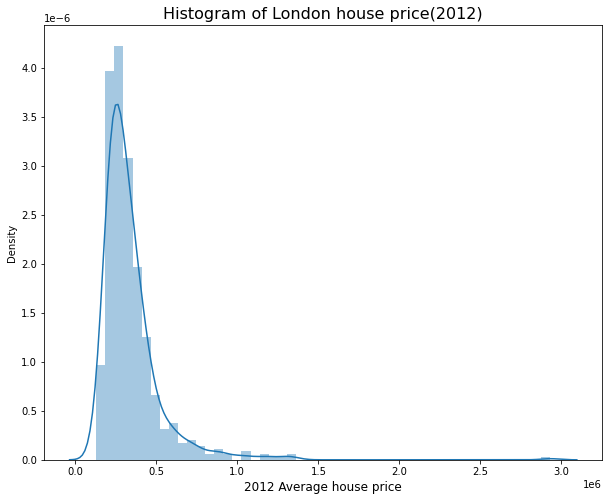

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(df1['price'])
plt.xlabel('2012 Average house price',fontsize=12)
plt.title("Histogram of London house price(2012)",fontsize=16)
plt.show()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


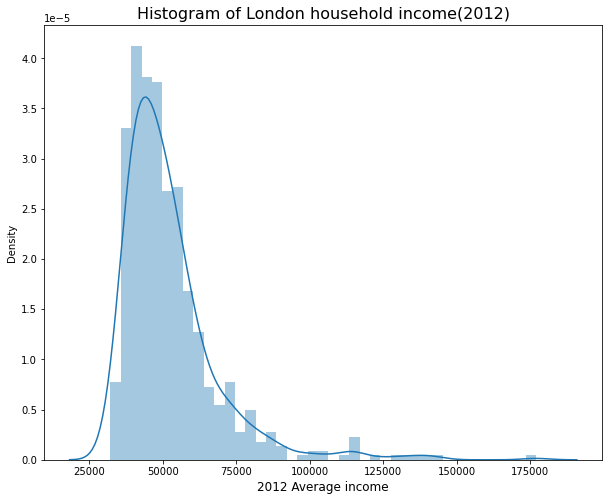

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(df1['income'])
plt.xlabel('2012 Average income',fontsize=12)
plt.title("Histogram of London household income(2012)",fontsize=16)
plt.show()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


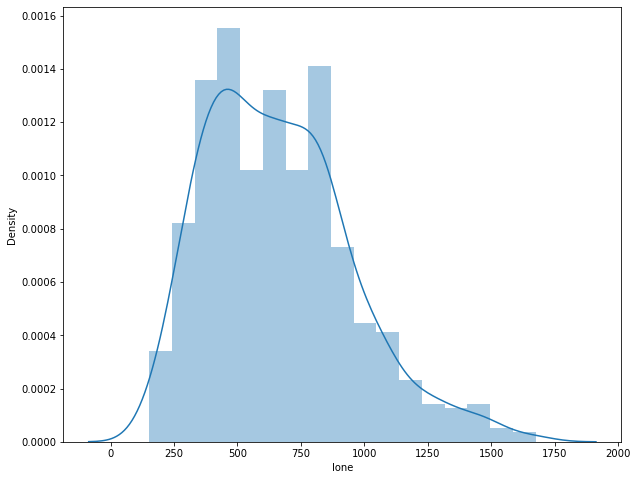

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(df1['lone'])
plt.show()

In [17]:
Price=[]
for i in df1['price']:
    i=math.log(i)
    Price.append(i)
df1['price']=Price

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
Income=[]
for i in df1['income']:
    i=math.log(i)
    Income.append(i)
df1['income']=Income

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
df1

,Borough,Wards,English,lone,price,GCSE,income,none_students,poverty,PTAL
1,City of London,City of London,3862.0,153.0,13.091904,366.700000,11.506807,6.7,11.6,7.631205
2,Barking and Dagenham,Abbey,3397.0,648.0,11.856515,329.577500,10.567978,16.4,29.8,5.713547
3,Barking and Dagenham,Alibon,3656.0,832.0,12.001505,341.218333,10.526480,31.2,34.0,3.242112
4,Barking and Dagenham,Becontree,3826.0,880.0,12.061047,346.401899,10.541650,28.0,31.5,2.855544
5,Barking and Dagenham,Chadwell Heath,3685.0,776.0,12.230765,326.658197,10.567721,29.1,31.6,2.249689
...,...,...,...,...,...,...,...,...,...,...
621,Westminster,Tachbrook,3910.0,291.0,13.253392,360.701639,11.295018,12.5,25.9,6.122962
622,Westminster,Vincent Square,4216.0,476.0,13.279367,344.876087,11.275683,11.7,26.8,6.813646
623,Westminster,Warwick,4227.0,287.0,13.392391,341.408955,11.364425,9.4,25.3,6.252940
624,Westminster,Westbourne,4064.0,956.0,12.886641,363.109220,10.891727,22.4,46.8,4.753717


/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


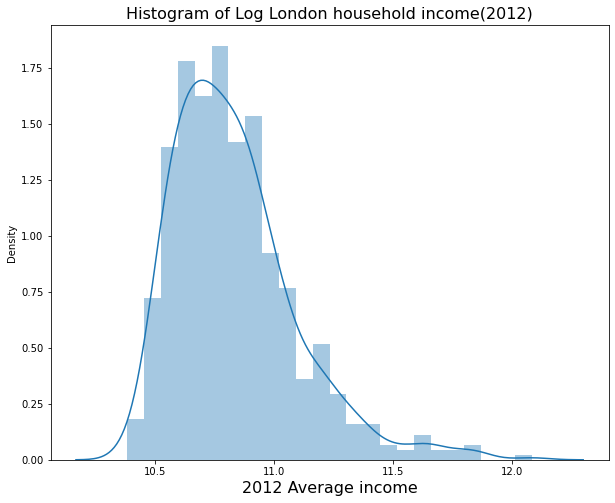

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(df1['income'])
plt.xlabel('2012 Average income',fontsize=16)
plt.title("Histogram of Log London household income(2012)",fontsize=16)
plt.show()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


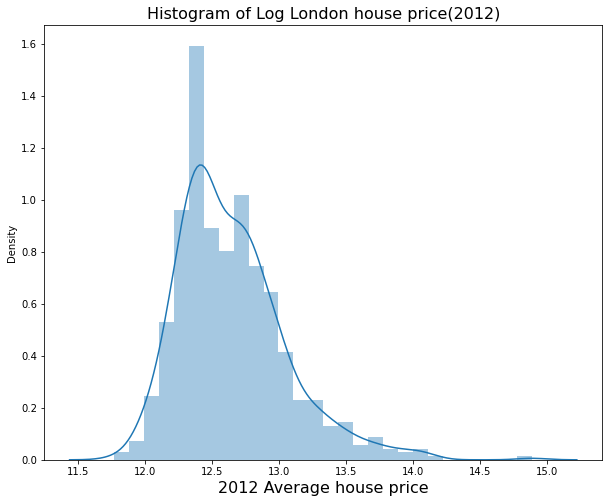

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(df1['price'])
plt.xlabel('2012 Average house price',fontsize=16)
plt.title("Histogram of Log London house price(2012)",fontsize=16)
plt.show()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


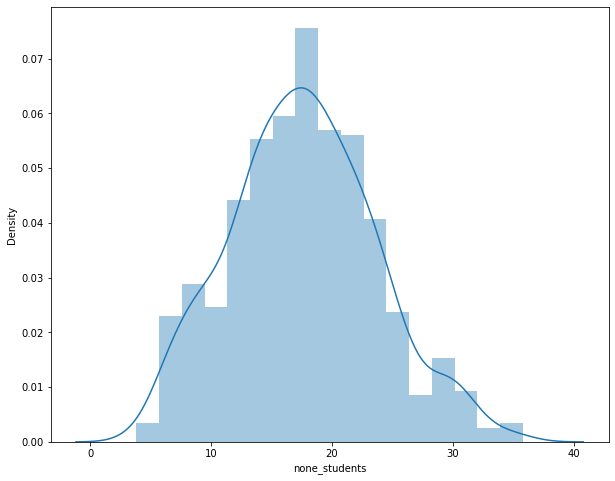

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(df1['none_students'])
plt.show()

In [23]:
df1

,Borough,Wards,English,lone,price,GCSE,income,none_students,poverty,PTAL
1,City of London,City of London,3862.0,153.0,13.091904,366.700000,11.506807,6.7,11.6,7.631205
2,Barking and Dagenham,Abbey,3397.0,648.0,11.856515,329.577500,10.567978,16.4,29.8,5.713547
3,Barking and Dagenham,Alibon,3656.0,832.0,12.001505,341.218333,10.526480,31.2,34.0,3.242112
4,Barking and Dagenham,Becontree,3826.0,880.0,12.061047,346.401899,10.541650,28.0,31.5,2.855544
5,Barking and Dagenham,Chadwell Heath,3685.0,776.0,12.230765,326.658197,10.567721,29.1,31.6,2.249689
...,...,...,...,...,...,...,...,...,...,...
621,Westminster,Tachbrook,3910.0,291.0,13.253392,360.701639,11.295018,12.5,25.9,6.122962
622,Westminster,Vincent Square,4216.0,476.0,13.279367,344.876087,11.275683,11.7,26.8,6.813646
623,Westminster,Warwick,4227.0,287.0,13.392391,341.408955,11.364425,9.4,25.3,6.252940
624,Westminster,Westbourne,4064.0,956.0,12.886641,363.109220,10.891727,22.4,46.8,4.753717


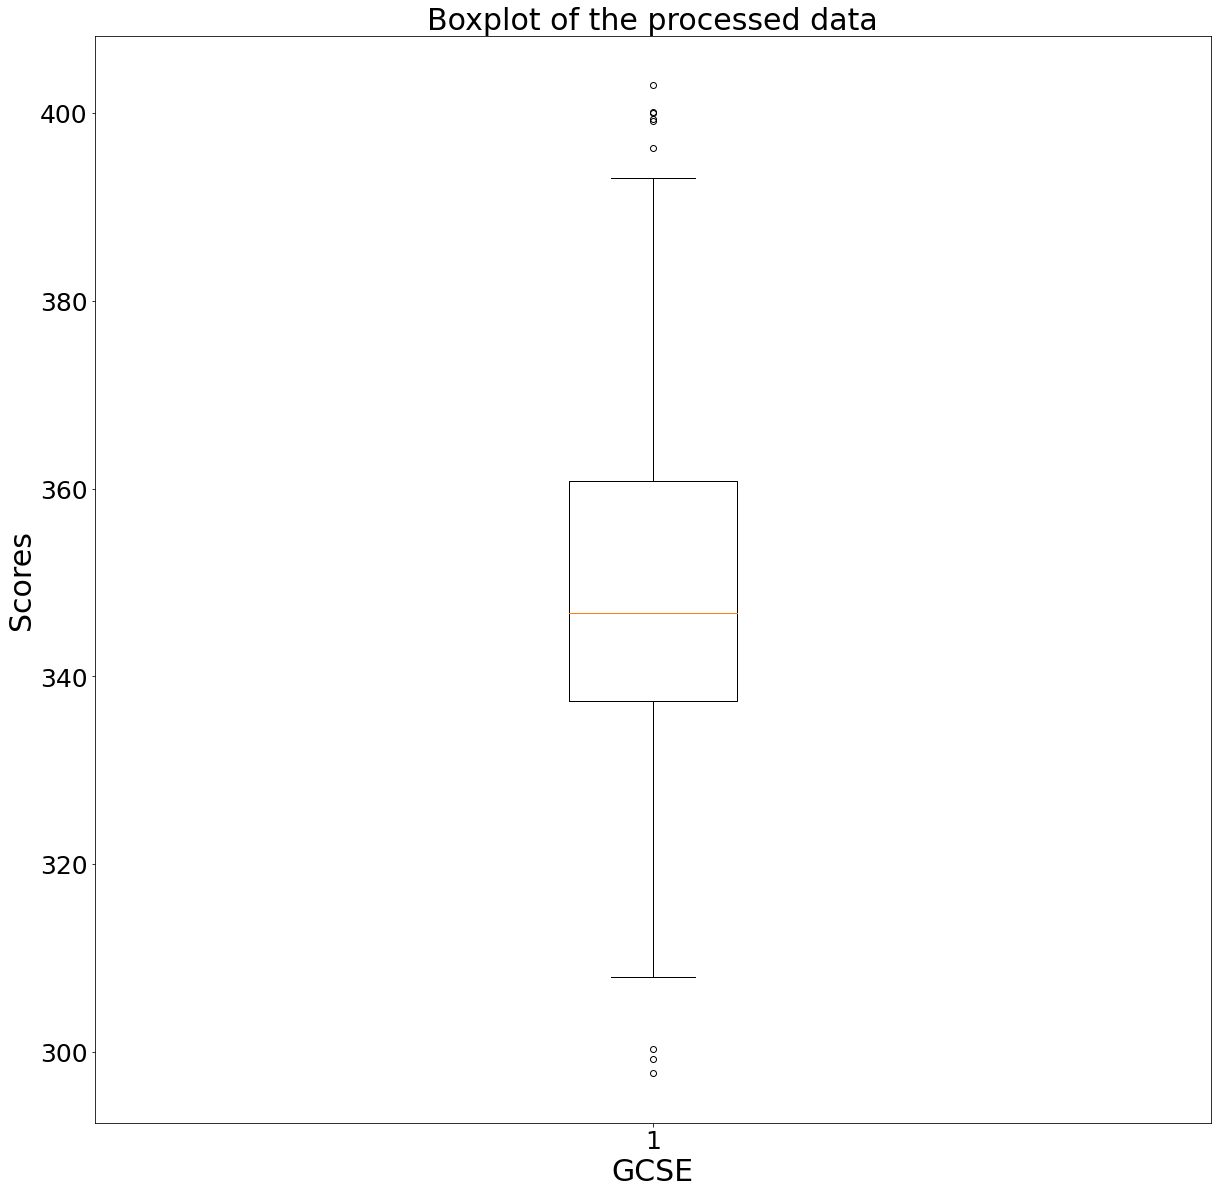

In [24]:
plt.figure(figsize=(20,20))
plt.xlabel('GCSE',fontsize=30)
plt.ylabel('Scores',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Boxplot of the processed data',fontsize=30)
plt.boxplot(df1['GCSE']);
plt.savefig('boxplot_bnb2.png',dpi=600,bbox_inches='tight')

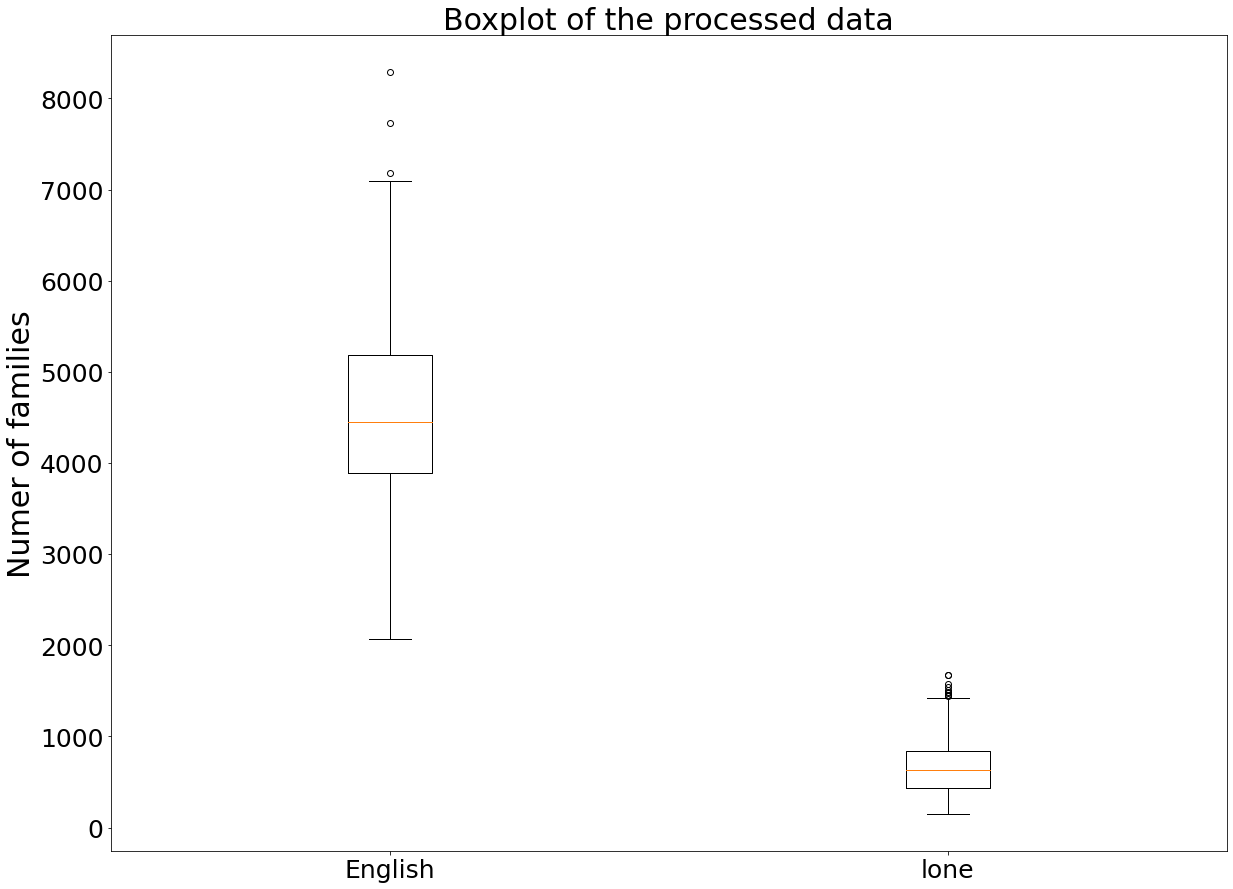

In [25]:
plt.figure(figsize=(20,15))
box_1,box_2=df1['English'],df1['lone']
labels='English','lone'
plt.ylabel('Numer of families',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Boxplot of the processed data',fontsize=30)
plt.boxplot([box_1,box_2],notch=False,labels=labels);
plt.savefig('boxplot_bnb.png',dpi=600,bbox_inches='tight')

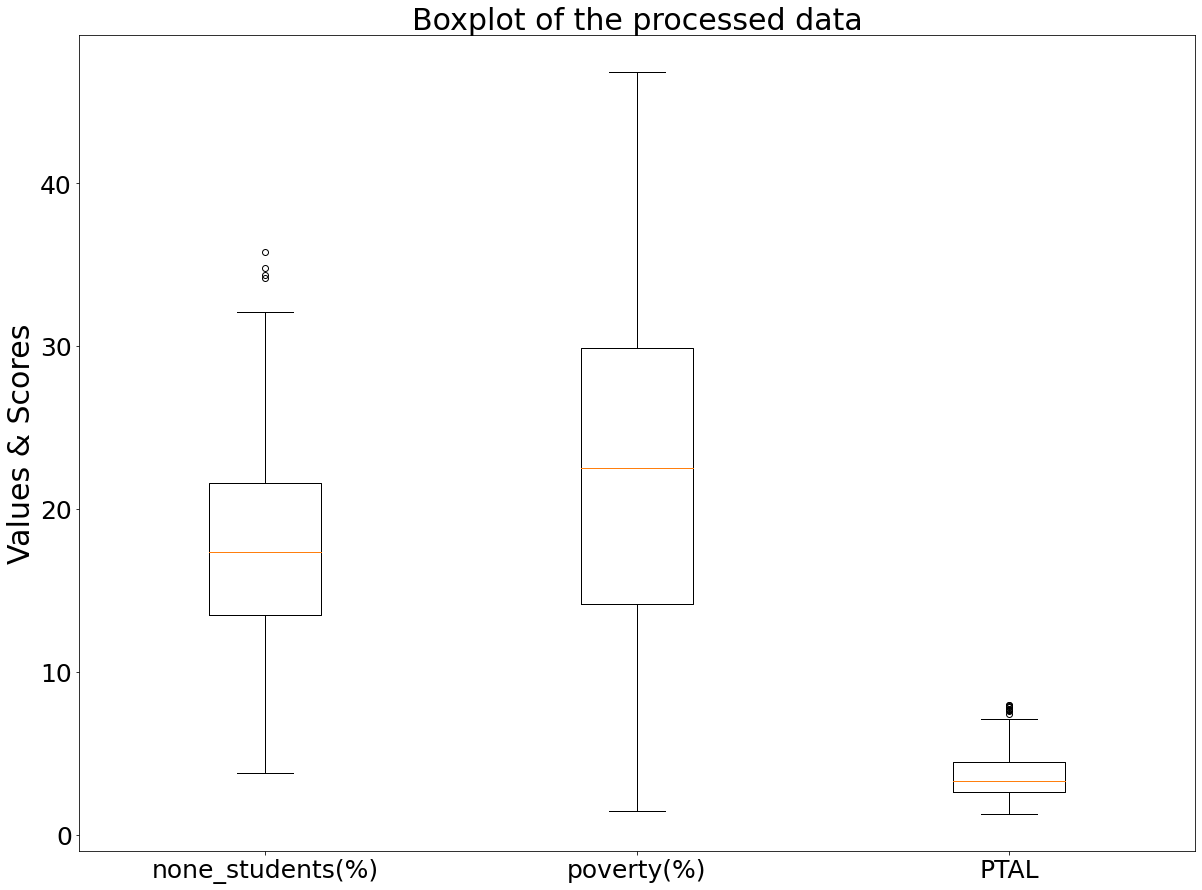

In [26]:
plt.figure(figsize=(20,15))
box_1,box_2,box_3=df1['none_students'],df1['poverty'],df1['PTAL']
labels='none_students(%)','poverty(%)','PTAL'
plt.ylabel('Values & Scores',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Boxplot of the processed data',fontsize=30)
plt.boxplot([box_1,box_2,box_3],notch=False,labels=labels);
plt.savefig('boxplot_bnb1.png',dpi=600,bbox_inches='tight')

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [28]:
def drop_column_using_vif_(df, thresh=5):
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [29]:
df1

,Borough,Wards,English,lone,price,GCSE,income,none_students,poverty,PTAL
1,City of London,City of London,3862.0,153.0,13.091904,366.700000,11.506807,6.7,11.6,7.631205
2,Barking and Dagenham,Abbey,3397.0,648.0,11.856515,329.577500,10.567978,16.4,29.8,5.713547
3,Barking and Dagenham,Alibon,3656.0,832.0,12.001505,341.218333,10.526480,31.2,34.0,3.242112
4,Barking and Dagenham,Becontree,3826.0,880.0,12.061047,346.401899,10.541650,28.0,31.5,2.855544
5,Barking and Dagenham,Chadwell Heath,3685.0,776.0,12.230765,326.658197,10.567721,29.1,31.6,2.249689
...,...,...,...,...,...,...,...,...,...,...
621,Westminster,Tachbrook,3910.0,291.0,13.253392,360.701639,11.295018,12.5,25.9,6.122962
622,Westminster,Vincent Square,4216.0,476.0,13.279367,344.876087,11.275683,11.7,26.8,6.813646
623,Westminster,Warwick,4227.0,287.0,13.392391,341.408955,11.364425,9.4,25.3,6.252940
624,Westminster,Westbourne,4064.0,956.0,12.886641,363.109220,10.891727,22.4,46.8,4.753717


In [30]:
GCSE = df1.loc[:,['English','lone','price','GCSE','income','none_students','poverty','PTAL']]

In [31]:
GCSE_reasons = sm.formula.ols('GCSE ~ + English + lone + price + income + none_students + poverty + PTAL',GCSE).fit()

In [32]:
GCSE_reasons.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GCSE   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     79.63
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           4.63e-82
Time:                        09:10:27   Log-Likelihood:                -2495.9
No. Observations:                 625   AIC:                             5008.
Df Residuals:                     617   BIC:                             5043.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       260.1671     44.387      5.861      0.000     173.000     347.334
English          -0.0005      0.001     -0.629      0.529      -0.002       0.001
lone             -0.0037      0.004     -0.930      0.352      -0.012       0.004
price            -5.2068      3.552     -1.466      0.143     -12.182       1.768
income           17.6003      6.439      2.733      0.006       4.956      30.245
none_students    -0.3586      0.166     -2.162      0.031      -0.684      -0.033
poverty          -0.7755      0.112     -6.945      0.000      -0.995      -0.556
PTAL             -1.8978      0.591     -3.211      0.001      -3.059      -0.737
==============================================================================
Omnibus:                       95.440   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.891
Skew:                          -0.711   Prob(JB):                     2.29e-67
Kurtosis:                       6.124   Cond. No.                     3.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
df1_new = drop_column_using_vif_(GCSE.drop('GCSE', axis=1))

Dropping: income


In [34]:
df1.columns

Index(['Borough', 'Wards', 'English', 'lone', 'price', 'GCSE', 'income',
       'none_students', 'poverty', 'PTAL'],
      dtype='object')

In [35]:
GCSE_predictors_selected_VIF = drop_column_using_vif_(GCSE.drop('GCSE', axis=1))
print("The columns remaining after VIF selection are:")
print(GCSE_predictors_selected_VIF.columns)

Dropping: income
The columns remaining after VIF selection are:
Index(['English', 'lone', 'price', 'none_students', 'poverty', 'PTAL'], dtype='object')


In [36]:
GCSE1 = sm.OLS(endog=GCSE[['GCSE']], exog=sm.add_constant(GCSE_predictors_selected_VIF)).fit()
GCSE1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GCSE   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     90.71
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.85e-81
Time:                        09:10:28   Log-Likelihood:                -2499.6
No. Observations:                 625   AIC:                             5013.
Df Residuals:                     618   BIC:                             5044.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           353.2101     28.637     12.334      0.000     296.973     409.448
English           0.0002      0.001      0.280      0.780      -0.001       0.002
lone             -0.0067      0.004     -1.745      0.082      -0.014       0.001
price             2.5690      2.138      1.202      0.230      -1.629       6.767
none_students    -0.4086      0.166     -2.466      0.014      -0.734      -0.083
poverty          -0.8533      0.109     -7.863      0.000      -1.066      -0.640
PTAL             -1.7167      0.590     -2.907      0.004      -2.876      -0.557
==============================================================================
Omnibus:                       82.951   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.716
Skew:                          -0.620   Prob(JB):                     1.48e-57
Kurtosis:                       5.918   Cond. No.                     2.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

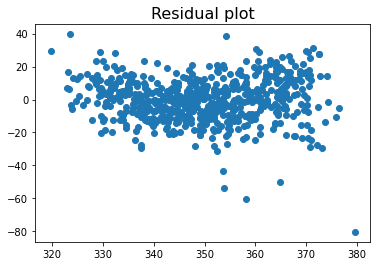

In [37]:
plt.scatter(GCSE1.fittedvalues, GCSE1.resid)
plt.title("Residual plot",fontsize=16)
plt.show()

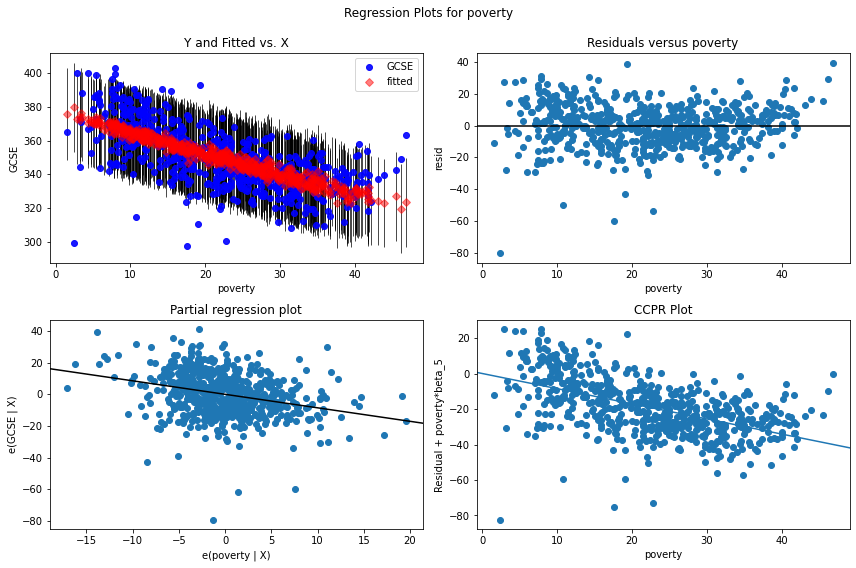

In [38]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(GCSE1, 'poverty', fig=fig)

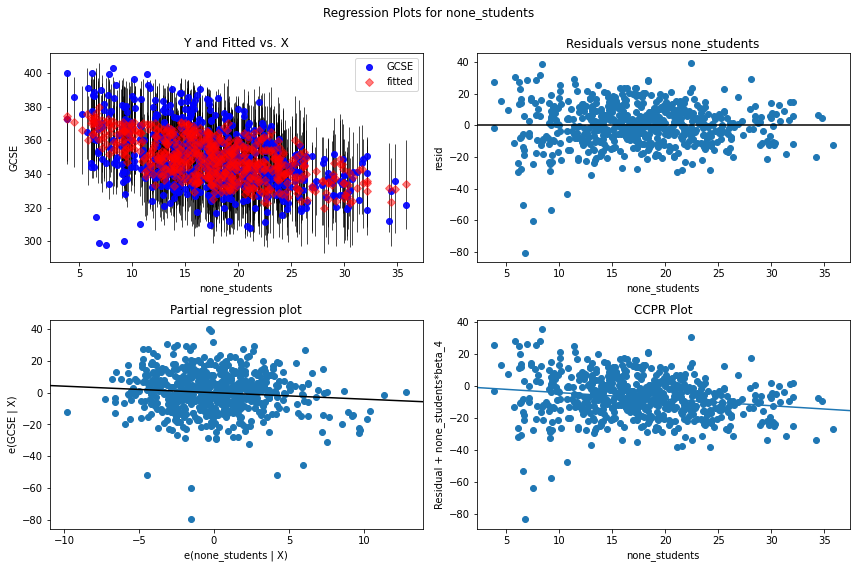

In [39]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(GCSE1, 'none_students', fig=fig)

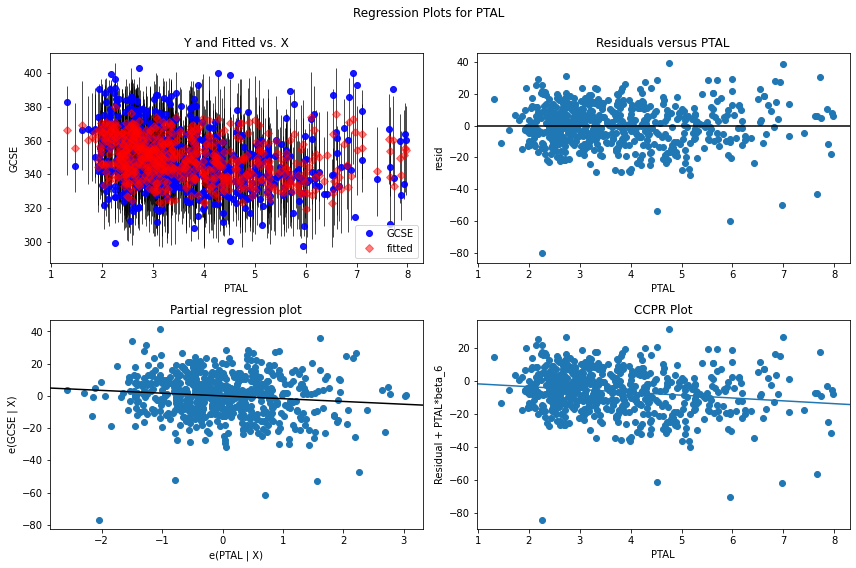

In [40]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(GCSE1, 'PTAL', fig=fig)

In [41]:
GCSE_predictors_adding_random = GCSE_predictors_selected_VIF
# using a seed to make the result reproducible
np.random.seed(420)

# adding 'totally_random', which is random noise and shows no relationship with the response variable
GCSE_predictors_adding_random['totally_random'] = np.random.normal(0,5,GCSE_predictors_adding_random.shape[0])
# the model without windspeed
GCSE_random = sm.OLS(endog=GCSE[['GCSE']], exog=sm.add_constant(GCSE_predictors_adding_random)).fit()
GCSE_random.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GCSE   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     78.71
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.49e-81
Time:                        09:10:31   Log-Likelihood:                -2497.6
No. Observations:                 625   AIC:                             5011.
Df Residuals:                     617   BIC:                             5047.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            354.3984     28.573     12.403      0.000     298.287     410.510
English            0.0002      0.001      0.245      0.807      -0.001       0.002
lone              -0.0068      0.004     -1.783      0.075      -0.014       0.001
price              2.4707      2.133      1.158      0.247      -1.718       6.659
none_students     -0.4058      0.165     -2.455      0.014      -0.730      -0.081
poverty           -0.8495      0.108     -7.846      0.000      -1.062      -0.637
PTAL              -1.6825      0.589     -2.855      0.004      -2.840      -0.525
totally_random     0.2129      0.106      2.011      0.045       0.005       0.421
==============================================================================
Omnibus:                       79.977   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.789
Skew:                          -0.598   Prob(JB):                     3.48e-55
Kurtosis:                       5.863   Cond. No.                     2.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
GCSE_no_constant = sm.OLS(endog=GCSE[['GCSE']], exog=GCSE_predictors_selected_VIF).fit()
GCSE_no_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   GCSE   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.991e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:10:31   Log-Likelihood:                         -2567.2
No. Observations:                 625   AIC:                                      5148.
Df Residuals:                     618   BIC:                                      5179.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
English            0.0015      0.001      1.787      0.074      -0.000       0.003
lone               0.0021      0.004      0.497      0.619      -0.006       0.010
price             28.5932      0.377     75.941      0.000      27.854      29.333
none_students      0.7101      0.155      4.586      0.000       0.406       1.014
poverty           -0.9738      0.120     -8.088      0.000      -1.210      -0.737
PTAL              -2.9528      0.648     -4.556      0.000      -4.226      -1.680
totally_random     0.1857      0.118      1.572      0.117      -0.046       0.418
==============================================================================
Omnibus:                      123.343   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.660
Skew:                          -0.849   Prob(JB):                    5.22e-109
Kurtosis:                       7.033   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
GCSE

,English,lone,price,GCSE,income,none_students,poverty,PTAL
1,3862.0,153.0,13.091904,366.700000,11.506807,6.7,11.6,7.631205
2,3397.0,648.0,11.856515,329.577500,10.567978,16.4,29.8,5.713547
3,3656.0,832.0,12.001505,341.218333,10.526480,31.2,34.0,3.242112
4,3826.0,880.0,12.061047,346.401899,10.541650,28.0,31.5,2.855544
5,3685.0,776.0,12.230765,326.658197,10.567721,29.1,31.6,2.249689
...,...,...,...,...,...,...,...,...
621,3910.0,291.0,13.253392,360.701639,11.295018,12.5,25.9,6.122962
622,4216.0,476.0,13.279367,344.876087,11.275683,11.7,26.8,6.813646
623,4227.0,287.0,13.392391,341.408955,11.364425,9.4,25.3,6.252940
624,4064.0,956.0,12.886641,363.109220,10.891727,22.4,46.8,4.753717


In [44]:
df1[(df1.poverty < 10)&(df1.GCSE < 320)]

,Borough,Wards,English,lone,price,GCSE,income,none_students,poverty,PTAL
448,Merton,Village,3183.0,168.0,13.847978,299.25,11.432149,6.8,2.4,2.254974


In [45]:
df2=df1

In [46]:
df2.drop(df2[df2['poverty']==2.4].index.values,axis=0,inplace=True)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
df2

,Borough,Wards,English,lone,price,GCSE,income,none_students,poverty,PTAL
1,City of London,City of London,3862.0,153.0,13.091904,366.700000,11.506807,6.7,11.6,7.631205
2,Barking and Dagenham,Abbey,3397.0,648.0,11.856515,329.577500,10.567978,16.4,29.8,5.713547
3,Barking and Dagenham,Alibon,3656.0,832.0,12.001505,341.218333,10.526480,31.2,34.0,3.242112
4,Barking and Dagenham,Becontree,3826.0,880.0,12.061047,346.401899,10.541650,28.0,31.5,2.855544
5,Barking and Dagenham,Chadwell Heath,3685.0,776.0,12.230765,326.658197,10.567721,29.1,31.6,2.249689
...,...,...,...,...,...,...,...,...,...,...
621,Westminster,Tachbrook,3910.0,291.0,13.253392,360.701639,11.295018,12.5,25.9,6.122962
622,Westminster,Vincent Square,4216.0,476.0,13.279367,344.876087,11.275683,11.7,26.8,6.813646
623,Westminster,Warwick,4227.0,287.0,13.392391,341.408955,11.364425,9.4,25.3,6.252940
624,Westminster,Westbourne,4064.0,956.0,12.886641,363.109220,10.891727,22.4,46.8,4.753717


In [48]:
GCSE_new = sm.formula.ols('GCSE ~ + English + lone + price + none_students + poverty + PTAL',df2).fit()

In [49]:
GCSE_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GCSE   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           4.39e-88
Time:                        09:10:31   Log-Likelihood:                -2476.4
No. Observations:                 624   AIC:                             4967.
Df Residuals:                     617   BIC:                             4998.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       334.3051     27.927     11.971      0.000     279.462     389.148
English       -8.001e-05      0.001     -0.111      0.912      -0.001       0.001
lone             -0.0054      0.004     -1.448      0.148      -0.013       0.002
price             4.2488      2.090      2.033      0.042       0.145       8.352
none_students    -0.4286      0.161     -2.668      0.008      -0.744      -0.113
poverty          -0.8603      0.105     -8.176      0.000      -1.067      -0.654
PTAL             -2.0536      0.575     -3.571      0.000      -3.183      -0.924
==============================================================================
Omnibus:                       31.000   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.130
Skew:                          -0.343   Prob(JB):                     1.07e-12
Kurtosis:                       4.284   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

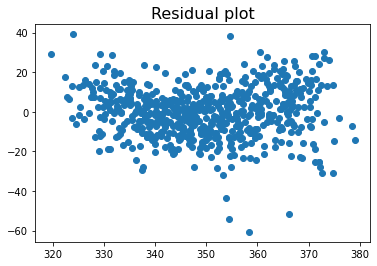

In [50]:
plt.scatter(GCSE_new.fittedvalues, GCSE_new.resid)
plt.title("Residual plot",fontsize=16)
plt.show()

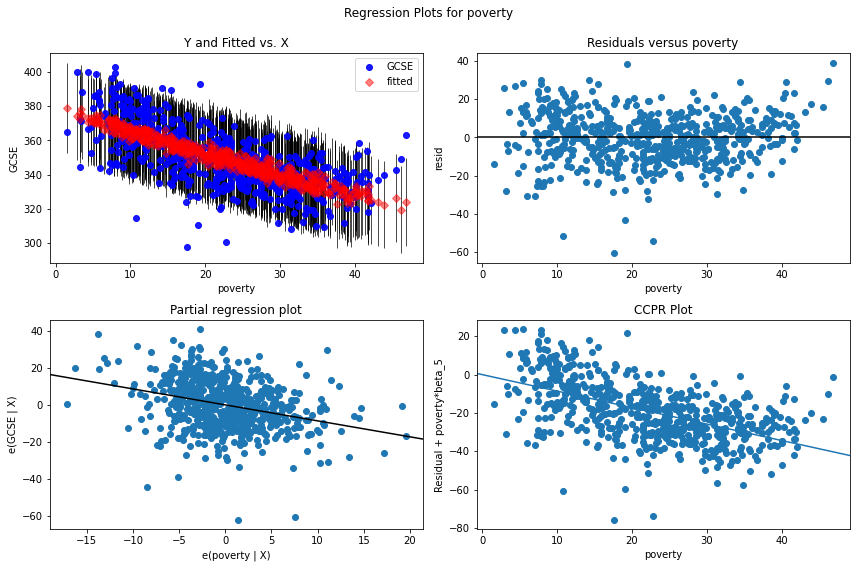

In [51]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(GCSE_new, 'poverty', fig=fig)

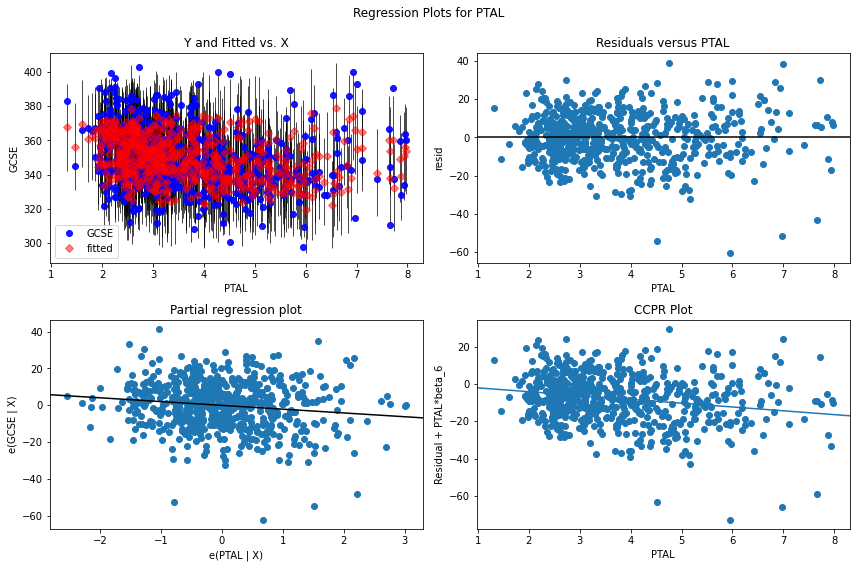

In [52]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(GCSE_new, 'PTAL', fig=fig)

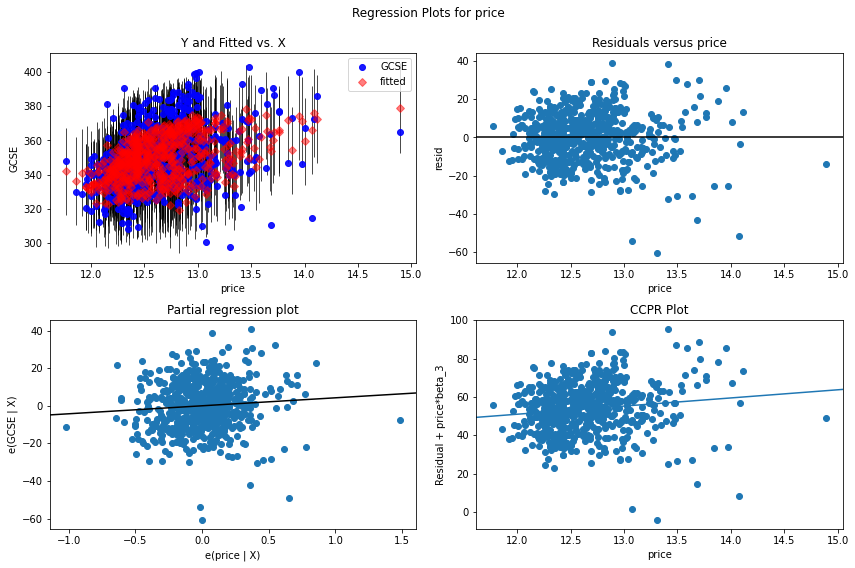

In [53]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(GCSE_new, 'price', fig=fig)

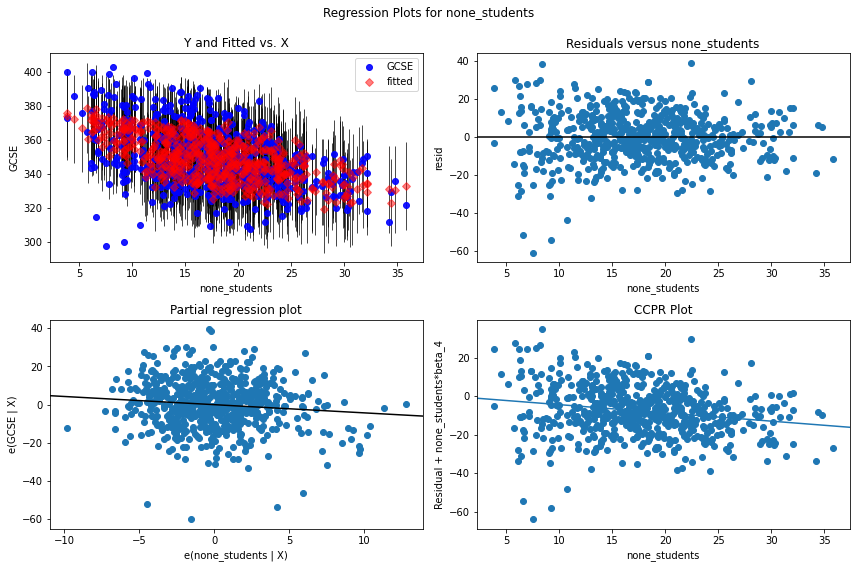

In [54]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(GCSE_new, 'none_students', fig=fig)